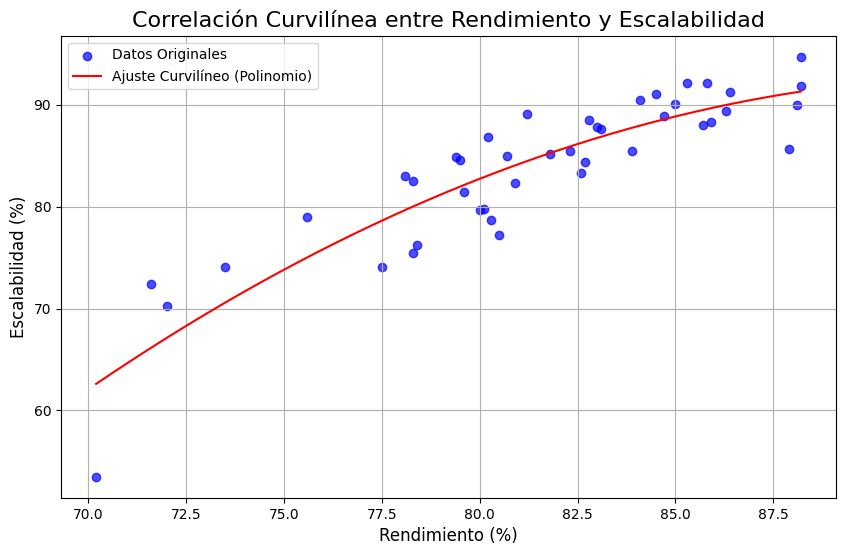

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV con el delimitador correcto
file_path = 'BasesDatosRelacionalesNoRelacionales.csv'
data = pd.read_csv(file_path, sep=',')  # Usar coma como delimitador

# Limpiar los datos: eliminar el signo '%' y convertir las columnas a valores numéricos
columns_to_clean = ['Rendimiento (%)', 'Escalabilidad (%)', 'Flexibilidad (%)',
                    'Facilidad de uso (%)', 'Costo de mantenimiento (%)', 'Popularidad (%)']

for column in columns_to_clean:
    if column in data.columns:  # Verificar que la columna exista
        data[column] = data[column].str.rstrip('%').astype(float)

# Seleccionar dos variables para graficar la correlación curvilínea
x = data['Rendimiento (%)']
y = data['Escalabilidad (%)']

# Ajustar una curva polinómica de segundo grado (parábola)
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)

# Crear valores ajustados de y para la curva
x_values = np.linspace(x.min(), x.max(), 500)
y_values = polynomial(x_values)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Datos Originales')
plt.plot(x_values, y_values, color='red', label='Ajuste Curvilíneo (Polinomio)')

# Etiquetas y título
plt.title('Correlación Curvilínea entre Rendimiento y Escalabilidad', fontsize=16)
plt.xlabel('Rendimiento (%)', fontsize=12)
plt.ylabel('Escalabilidad (%)', fontsize=12)
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()
